# IP Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np

plt.rcParams["figure.figsize"]=15,10 #Set plot size
plt.rcParams.update({'font.size': 16}) #set plot size font
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"}) #Add grid lines to plot

### Other Functions

In [3]:
def Knots(MS):
    return MS / 0.5144

def MS(Knots):
    return Knots * 0.5144

### Aircraft Parameters

In [4]:
mass = 79000
AbortSpeed = 120 #In Knots

T1 = 106.8 * 1000 #Engine Thrust A320-200 with 2* CFM International LEAP 1A at T/O power (106.80 kN)    ~~TBC~~
T2 = 106.8 * 1000

Decel = 6 #Deceleration of Max Brakes 6ms-2  ~~TBC~~

### Other Parameters

In [5]:
g = 9.81


In [6]:
V = 0
t = 0
t_step = 1e-3

## Ground Roll

Accelerating along Runway with CONSTANT Thrust


In [7]:
L = 0  # Ground Roll (Zero Lift) {for now}
D_i = 0  # Zero Lift -> Drag = 0   {for now}

mu = 0  # Zero Friction {for now}

W = 9.81 * mass

D_f = mu * (L - W)    #Friction Drag


# N2 : F = m a
#    : F = m dV/dt

def dV(V,t):
    return (T1 + T2 - D_i - D_f)/mass


Wall time: 39.5 ms


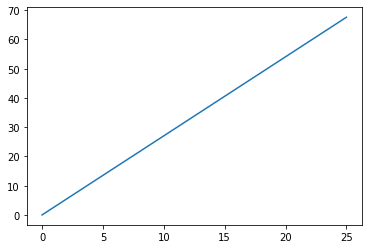

In [8]:
%%time

def dV(t,V):
    return (T1 + T2 - D_i - D_f)/mass

V = solve_ivp(dV,[0,25],[0])

plt.plot(V.t,V.y[0])
plt.grid()

Wall time: 24.5 ms


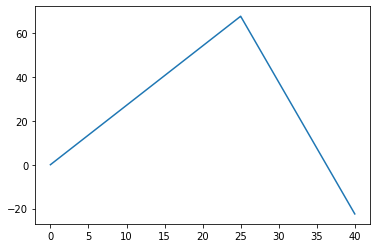

In [9]:
%%time
t_a = 25

def dV(t,V):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

V = solve_ivp(dV,[0,40],[0],rtol=1e-9)

plt.plot(V.t,V.y[0])
plt.grid()

Wall time: 26 ms


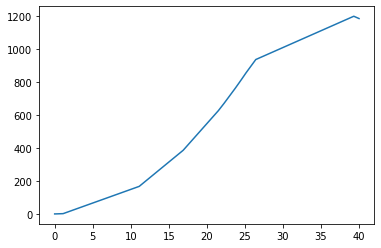

In [10]:
%%time
t_a = 25

def dV(t,V):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine r and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,40],y0,rtol=1e-9)

plt.plot(S.t,S.y[0])
plt.grid()

Wall time: 4.36 s


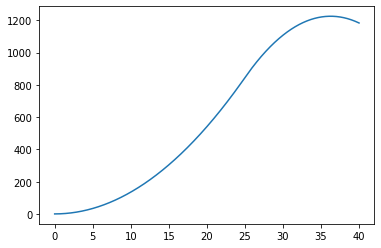

In [11]:
%%time
t_a = 25

def dV(t,V):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine r and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,40],y0,rtol=1e-9,max_step=1e-3)

plt.plot(S.t,S.y[0])
plt.grid()

Wall time: 681 ms


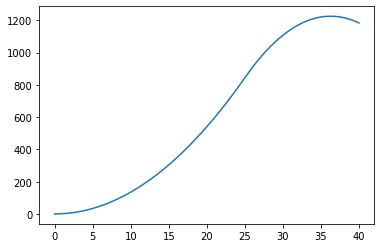

In [12]:
%%time
t_a = 25

def dV(t,V):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine r and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,40],y0,rtol=1e-9,max_step=1e-3,method="LSODA")

plt.plot(S.t,S.y[0])
plt.grid()

## With Abort when stopped

In [25]:
%%time
#Define the acceleration of the aircraft
def dV(t,V):
    #Before aborting use the Newtons 2nd law equation
    #After abort use defined max deceleration rate
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

#Solver termination function
def full_stop(t, y): return y[0]
full_stop.terminal = True
full_stop.direction = -1

#Solve the defined differential equation
V = solve_ivp(dV,[0,40],[0],rtol=1e-9,events=full_stop)

#Output time of stop
V.t_events

Wall time: 14 ms


[array([36.26581003])]

In [14]:
print(V.t)

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 1.11110000e+00 1.11111000e+01 1.68888800e+01
 2.15111040e+01 2.22506598e+01 2.37297715e+01 2.43214162e+01
 2.45580741e+01 2.46527372e+01 2.48420635e+01 2.49177940e+01
 2.49480862e+01 2.49602031e+01 2.49844369e+01 2.49950132e+01
 2.49972931e+01 2.49995221e+01 2.49997057e+01 2.49999536e+01
 2.49999830e+01 2.50000727e+01 2.50001623e+01 2.50010587e+01
 2.50100222e+01 2.50996580e+01 2.59960160e+01 3.49595954e+01
 3.62658100e+01]


In [15]:
print(V.y)

[[0.00000000e+00 2.70379747e-04 2.97417722e-03 3.00121519e-02
  3.00391899e-01 3.00418937e+00 3.00421641e+01 4.56641110e+01
  5.81616685e+01 6.01612777e+01 6.41604962e+01 6.57601835e+01
  6.64000585e+01 6.66560085e+01 6.71679084e+01 6.73726684e+01
  6.74545724e+01 6.74873340e+01 6.75528572e+01 6.75814534e+01
  6.75876179e+01 6.75936446e+01 6.75941410e+01 6.75948113e+01
  6.75948909e+01 6.75944241e+01 6.75938863e+01 6.75885082e+01
  6.75347267e+01 6.69969119e+01 6.16187643e+01 7.83728770e+00
  7.10542736e-15]]


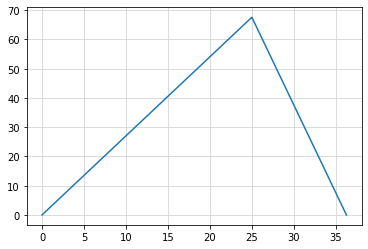

In [16]:
plt.plot(V.t,V.y[0])

Wall time: 17.6 s


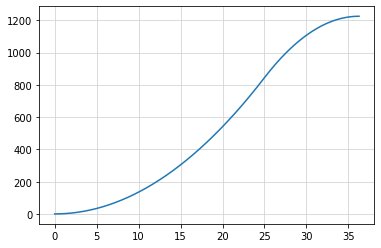

In [30]:
%%time
t_a = 25

def dV(t,V):
    if t <= t_a:
        return (T1 + T2 - D_i - D_f)/mass
    else:
        return -6

def f(t,y):
    S = y[0]              # extract r from array y
    V = y[1]              # extract v from array y 
    dSdt = V              # compute right hand side
    dVdt = dV(t,V)
    return np.array([dSdt, dVdt]) # return array


# initial conditions
s0 = 0 # initial s
v0 = 0 # initial v

# combine s and v into array y0
y0 = np.array([s0, v0])

S = solve_ivp(f,[0,V.t_events[0]],y0,rtol=1e-9,max_step=1e-4,events=full_stop,method="LSODA")

plt.plot(S.t,S.y[0])

In [18]:
print(S.y[0])

[0.00000000e+00 1.38888650e-06 4.16665950e-06 ... 1.22569299e+03
 1.22569299e+03 1.22569299e+03]


In [18]:
np.max(S.y[0])

1225.6929948101583